<img src="../images/5thNRST_logo.png" alt="NOWPAP" width="900" height="700">

## NOWPAP REMOTE SENSING TRAINING COURSE   
#### Webinar 2: Monitoring and Assessment of Water Quality by Ocean Color Remote Sensing
<span style="color:brown; font-size:1.1em;font-style:italic">Time series analysis: data download</span>

<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Genki Terauchi and Eligio Maure </span>

<span style="font-family:Helvieta; font-size:1em;">Please contact terauchi@npec.or.jp for inquiries. </span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Exercise with MODIS-Aqua](#3.-Exercise-with-MODIS-Aqua)
- [4. Exercise with SGLI/GCOM-C ](#4.-Exercise-with-SGLI/GCOM-C)
- [5. Resources](#5.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to explore the flags that are used to indicate quality of Level 2 Ocean Color products. 

These flags define the conditions that make it impossible to calculate any meaningful Level 2 parameters.

You will learn how to read level 2 products and display flag information to learn about the flags that invalidate the pixels. 
***

# 2. Library import   
[Return to the "Table of contents"](#Table-of-contents)

Start by importing require modules for data analysis   
If a module throws a `ModuleNotFoundError` install it with the command  
- `!pip install -r requirements.txt`

In [1]:
#!pip install -r ../requirements.txt

In [2]:
# Data manipulation of handing hdf5 and netCDF file
import numpy as np
import h5py 
from netCDF4 import Dataset

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

- **Local modules**  
Include a local library (scripts) from where we import our custom fuctions.  
To be able to do so, we append the path of where the custom functions are saved before importing.

In [3]:
#Creating path
sys.path.append(str(Path('.').absolute().parent))
import sutilsx as util

# 3. Exercise with MODIS-Aqua
[Return to the "Table of contents"](#Table-of-contents)

In [4]:
# Define and read data (MODIS-Aqua) level 2 data
nc_file = Path('sample_data/A2021097040500.L2_LAC_OC.nc').absolute()
with Dataset(nc_file, 'r') as nc:
    lon = nc.groups['navigation_data']['longitude'][:]
    lat = nc.groups['navigation_data']['latitude'][:]
    flags = nc.groups['geophysical_data']['l2_flags'][:]
    chl = nc.groups['geophysical_data']['chlor_a'][:]
    

- **MODIS-Aqua level-2 flag meaning**


```javascript
flag_means = {0: 'ATMFAIL',    1: 'LAND',        2: 'PRODWARN', 
              3: 'HIGLINT',    4: 'HILT',        5: 'HISATZEN',
              6: 'COASTZ',     7: 'SPARE',       8: 'STRAYLIGHT', 
              9: 'CLDICE',    10: 'COCCOLITH',  11: 'TURBIDW',
              12: 'HISOLZEN', 13: 'SPARE',      14: 'LOWLW', 
              15: 'CHLFAIL',  16: 'NAVWARN',    17: 'ABSAER', 
              18: 'SPARE',    19: 'MAXAERITER', 20: 'MODGLINT', 
              21: 'CHLWARN',  22: 'ATMWARN',    23: 'SPARE',
              24: 'SEAICE',   25: 'NAVFAIL',    26: 'FILTER', 
              27: 'SPARE',    28: 'BOWTIEDEL',  29: 'HIPOL',
              30: 'PRODFAIL', 31: 'SPARE'};
```

- **Define a function to retrieve the flag-bit information**

In [5]:
def get_flag_mask(bit: int, l2_flags):
    mask = l2_flags & (1 << bit)
    return np.ma.masked_where(mask==0, mask)

- **Explore the L2 flags**

.
.


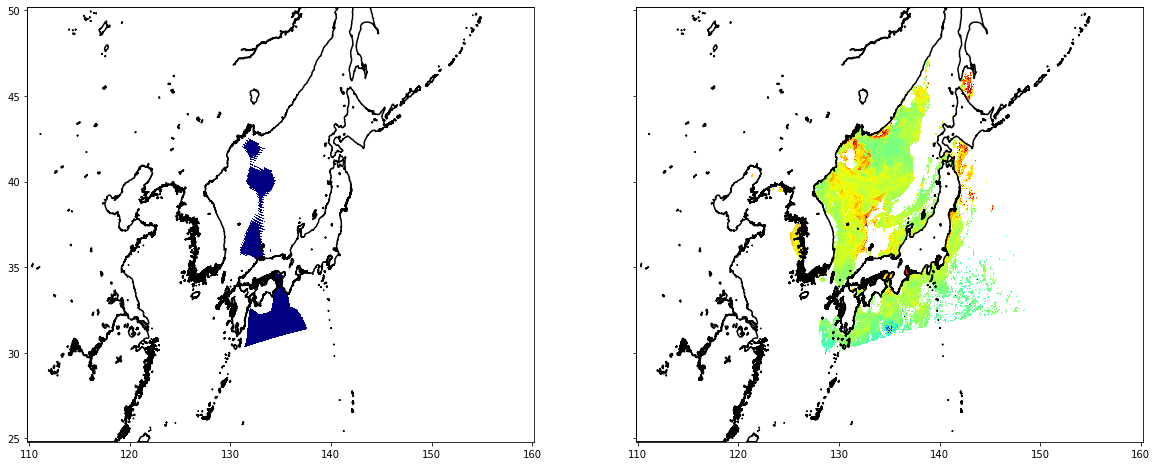

In [6]:
bit = 3 #3 means 'HIGLINT' 
fmask = get_flag_mask(bit=bit, l2_flags=flags); 

fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)
ax[0].pcolormesh(lon, lat, fmask, cmap='jet')
ax[1].pcolormesh(lon, lat, chl, cmap='jet', norm=colors.LogNorm())

if bit != 1:
    util.add_coastline(ax=ax[0])
    util.add_coastline(ax=ax[1])

# 4. Exercise with SGLI/GCOM-C 
[Return to the "Table of contents"](#Table-of-contents)
- Try it - 5 min

- **SGLI/GCOM-C level-2 flag meaning**

```javascript
flag_means = {0: 'DATAMISS',  1: "LAND",
              2: 'ATMFAIL',   3: "CLDICE",
              4: "CLDAFFCTD", 5: "STRAYLIGHT",
              6: "HIGLINT",   7: "MODGLINT",
              8: 'HISOLZ',    9: 'HITAUA',
              10: 'NEGNLW',   11: 'TURBIDW',
              12: 'SHALLOW',  13: "ITERFAILCDOM",
              14: 'CHLWARN',  15: 'SPARE'};
```

In [14]:
# Define and read data
h5_file = Path('sample_data/GC1SG1_201905270131G05010_L2SG_IWPRQ_2000.h5').absolute()

lat = util.navigation_data(file=h5_file, key='lat')
lon = util.navigation_data(file=h5_file, key='lon')

flags = util.h5_read(file=h5_file, key='QA_flag')
chl = (util.h5_read(file=h5_file, key='CHLA'))

.
.


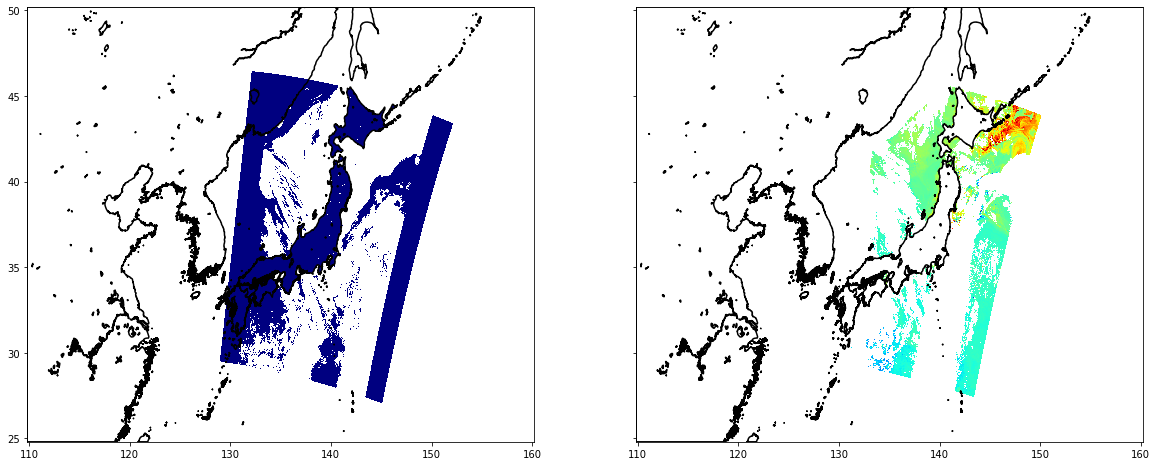

In [21]:
bit = 2
fmask = get_flag_mask(bit=bit, l2_flags=flags); 

fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)
ax[0].pcolormesh(lon, lat, fmask, cmap='jet')
# ax[1].pcolormesh(lon, lat, chl, cmap='jet')
ax[1].pcolormesh(lon, lat, chl, cmap='jet', norm=colors.LogNorm())

if bit != 1:
    util.add_coastline(ax=ax[0])
    util.add_coastline(ax=ax[1])

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :) 
    Now try the same exercise with other sensors including GOCI, VIIRS, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://oceancolor.gsfc.nasa.gov/atbd/ocl2flags/
2. https://global.jaxa.jp/projects/sat/gcom_c/
3. https://ocean.nowpap3.go.jp/
4. https://github.com/npec/5th-NOWPAP-Training-Course-on-Remote-Sensing-Data-Analysis